# 20장 Vision Transformer (Vit)

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window 
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [2]:
# 라이브러리 임포트

import torch
from torch import nn, optim
from torchinfo import summary
from torchviz import make_dot
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

c:\Users\user\anaconda3\envs\torchgpu_py3.9\lib\site-packages\google\protobuf\runtime_version.py:112: UserWarning: Protobuf gencode version 5.27.5 is older than the runtime version 5.28.2 at onnx/onnx-ml.proto. Please avoid checked-in Protobuf gencode that can be obsolete.
  warnings.warn(
c:\Users\user\anaconda3\envs\torchgpu_py3.9\lib\site-packages\google\protobuf\runtime_version.py:112: UserWarning: Protobuf gencode version 5.27.5 is older than the runtime version 5.28.2 at onnx/onnx-operators-ml.proto. Please avoid checked-in Protobuf gencode that can be obsolete.
  warnings.warn(
c:\Users\user\anaconda3\envs\torchgpu_py3.9\lib\site-packages\google\protobuf\runtime_version.py:112: UserWarning: Protobuf gencode version 5.27.5 is older than the runtime version 5.28.2 at onnx/onnx-data.proto. Please avoid checked-in Protobuf gencode that can be obsolete.
  warnings.warn(


In [3]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [4]:
# GPU 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# **Transformer**

### 모델 불러 오기

In [6]:
weights = models.ViT_B_16_Weights.IMAGENET1K_V1
vit = models.vit_b_16(weights = weights)
print(weights)

ViT_B_16_Weights.IMAGENET1K_V1


In [7]:
print(vit)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [8]:
summary(vit,(1, 3, 224, 224))

c:\Users\user\anaconda3\envs\torchgpu_py3.9\lib\site-packages\torch\nn\modules\activation.py:1221: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  return torch._native_multi_head_attention(


Layer (type:depth-idx)                        Output Shape              Param #
VisionTransformer                             [1, 1000]                 768
├─Conv2d: 1-1                                 [1, 768, 14, 14]          590,592
├─Encoder: 1-2                                [1, 197, 768]             151,296
│    └─Dropout: 2-1                           [1, 197, 768]             --
│    └─Sequential: 2-2                        [1, 197, 768]             --
│    │    └─EncoderBlock: 3-1                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-2                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-3                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-4                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-5                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-6                 [1, 197, 768]             7,087,872
│    │    └─EncoderBlock: 3-7             

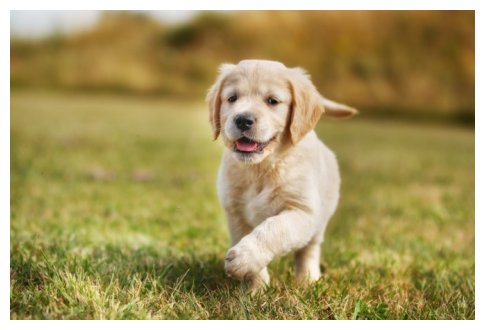

In [9]:
from PIL import Image

filename = "./golden.jpg"
img = Image.open(filename) # torch.Size([3, 366, 640]) 

plt.imshow(img)
plt.grid(None)
plt.axis("off")
plt.show()


In [16]:
preprocessed = weights.transforms()
img_tensor = preprocessed(img)

print("Image tensor shape:", img_tensor.shape)  # Should be [3, 224, 224]

Image tensor shape: torch.Size([1, 3, 224, 224])


In [12]:
vit = vit.to(device)

vit.eval()

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [17]:
img = img_tensor.unsqueeze(0).to(device)
output = vit(img)
output

tensor([[ 1.7242e-01, -1.3533e-01, -5.5473e-01, -3.2600e-01, -3.2524e-01,
          6.0302e-02, -1.4193e-01,  3.0145e-03,  5.0543e-02, -4.9414e-02,
         -8.6714e-02, -4.5993e-01, -2.6059e-01,  1.5029e-01, -3.2692e-01,
          3.1221e-01, -1.4011e-01, -3.4145e-01,  1.5873e-01, -2.6251e-01,
         -1.7628e-01, -8.3054e-02,  1.4802e-01,  5.7551e-01, -2.7244e-01,
         -2.0661e-01,  1.2875e-01,  4.3234e-03, -3.0197e-01,  2.5118e-01,
          2.5700e-01, -1.6148e-01,  2.9481e-01,  1.5440e-01,  1.3747e-01,
          2.4419e-01,  1.4160e-01, -3.6953e-01,  3.0247e-01, -9.8280e-02,
          3.1038e-01, -3.0506e-01,  1.8005e-01,  1.4380e-01, -1.4137e-01,
          3.2926e-01, -1.3490e-01,  2.9605e-01, -1.7539e-01, -6.6714e-02,
         -2.6848e-01,  1.9891e-01, -4.4626e-02, -3.6104e-01, -2.6228e-01,
         -7.2178e-02, -1.6355e-01,  2.3819e-01,  1.5466e-01, -5.8613e-01,
         -8.3064e-01, -5.1237e-01, -9.1716e-02,  9.9686e-02,  2.9706e-02,
          8.7632e-02, -8.6670e-02, -4.

In [21]:
idx = output.argmax(-1)
print(idx)

tensor([207], device='cuda:0')


In [24]:
weights.meta["categories"][idx]

'golden retriever'